In [ ]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

import os
from openai import AzureOpenAI

CHAT_MODEL =  os.environ.get("OPENAI_CHAT_DEPLOYMENT_NAME") 

client = AzureOpenAI(
  api_key = os.getenv("OPENAI_API_KEY"),  
  api_version = "2023-05-15",
  azure_endpoint = os.getenv("OPENAI_API_BASE")
)

In [ ]:
def get_completion(prompt, model=CHAT_MODEL):
    response = client.chat.completions.create(
        temperature=0, # this is the degree of randomness of the model's output
        model="drn-chat-dev2", # This is currently gpt-35-turbo
        messages=[
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content

## Self-Consistency 
The primary objective is to improve the simplistic greedy decoding often used in chain-of-thought (CoT) prompting. In this technique, several diverse reasoning paths are sampled through few-shot CoT. The responses generated from these paths are then evaluated, and the most consistent answer is selected. This method has a significant impact on enhancing the effectiveness of CoT prompting, particularly in tasks that require arithmetic and commonsense reasoning.

Reference: 
- https://arxiv.org/abs/2203.11171

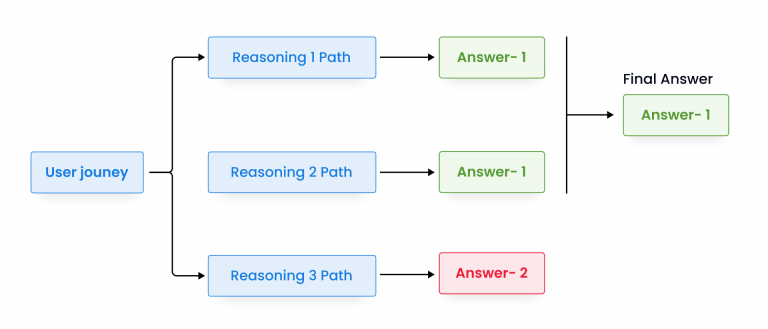

In [ ]:
prompt = f"""
When I was 12 my sister was half my age. Now
I’m 70 how old is my sister?
"""

response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
Q: There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done,
there will be 21 trees. How many trees did the grove workers plant today?
A: We start with 15 trees. Later we have 21 trees. The difference must be the number of trees they planted.
So, they must have planted 21 - 15 = 6 trees. The answer is 6.
Q: If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?
A: There are 3 cars in the parking lot already. 2 more arrive. Now there are 3 + 2 = 5 cars. The answer is 5.
Q: Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?
A: Leah had 32 chocolates and Leah’s sister had 42. That means there were originally 32 + 42 = 74
chocolates. 35 have been eaten. So in total they still have 74 - 35 = 39 chocolates. The answer is 39.
Q: Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops
did Jason give to Denny?
A: Jason had 20 lollipops. Since he only has 12 now, he must have given the rest to Denny. The number of
lollipops he has given to Denny must have been 20 - 12 = 8 lollipops. The answer is 8.
Q: Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does
he have now?
A: He has 5 toys. He got 2 from mom, so after that he has 5 + 2 = 7 toys. Then he got 2 more from dad, so
in total he has 7 + 2 = 9 toys. The answer is 9.
Q: There were nine computers in the server room. Five more computers were installed each day, from
monday to thursday. How many computers are now in the server room?
A: There are 4 days from monday to thursday. 5 computers were added each day. That means in total 4 * 5 =
20 computers were added. There were 9 computers in the beginning, so now there are 9 + 20 = 29 computers.
The answer is 29.
Q: Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many
golf balls did he have at the end of wednesday?
A: Michael initially had 58 balls. He lost 23 on Tuesday, so after that he has 58 - 23 = 35 balls. On
Wednesday he lost 2 more so now he has 35 - 2 = 33 balls. The answer is 33.
Q: Olivia has $23. She bought five bagels for $3 each. How much money does she have left?
A: She bought 5 bagels for $3 each. This means she spent $15. She has $8 left.
Q: When I was 12 my sister was half my age. Now I’m 70 how old is my sister?
A:
"""

response = get_completion(prompt)
print(response)

## Generated Knowledge Prompting 
Reference: 
- https://arxiv.org/pdf/2110.08387.pdf

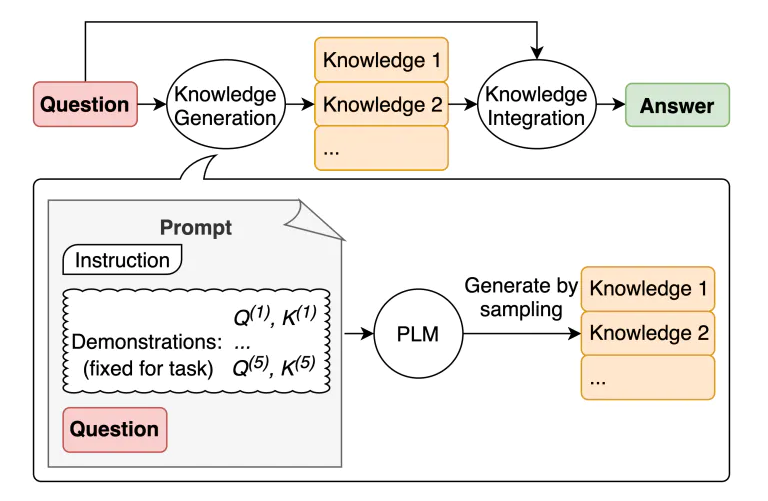

In [ ]:
prompt = f"""
Which country is larger, Congo or South Africa?
"""

response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
Generate some knowledge about the sizes of South Africa and Congo:
"""

response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
South Africa is a country located in the southernmost part of the African continent. It has a total land area of approximately 1,219,090 square kilometers, making it the 25th largest country in the world. South Africa is bordered by Namibia, Botswana, Zimbabwe, Mozambique, and Swaziland, and it has a coastline that stretches for 2,798 kilometers along the Atlantic and Indian Oceans.

On the other hand, the Democratic Republic of Congo, also known as Congo-Kinshasa, is a country located in Central Africa. It has a total land area of approximately 2,344,858 square kilometers, making it the 11th largest country in the world. Congo is bordered by nine countries, including Angola, Zambia, Tanzania, and Uganda, and it has a coastline that stretches for 37 kilometers along the Atlantic Ocean.

In terms of size, Congo is almost twice as large as South Africa. However, South Africa has a higher population density, with an estimated population of 59.3 million people compared to Congo's estimated population of 89.6 million people.

Which country is larger, Congo or South Africa?
"""

response = get_completion(prompt)
print(response)

## Tree of Thoughts (ToT)
References: https://arxiv.org/abs/2305.10601 https://arxiv.org/abs/2305.08291

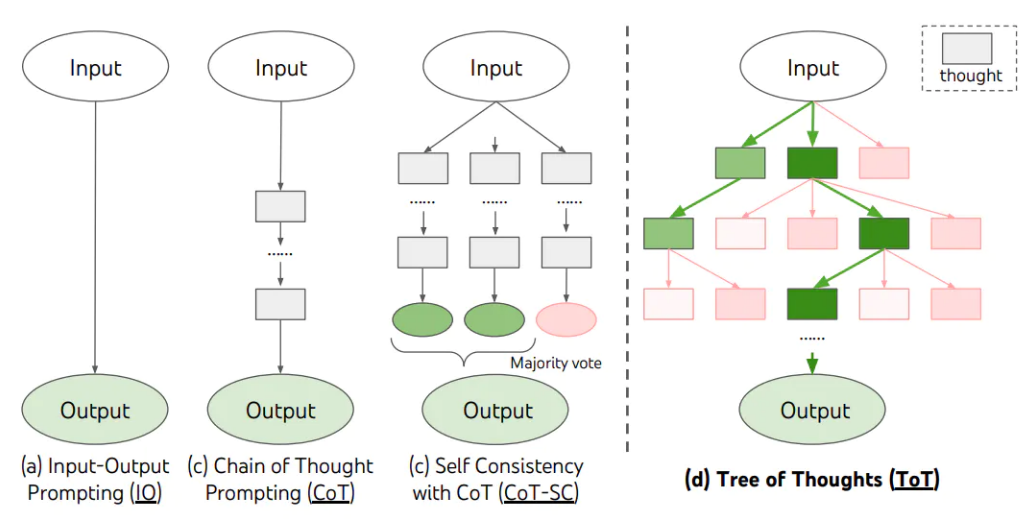

References: 
- https://arxiv.org/abs/2305.10601
- https://arxiv.org/abs/2305.08291

In [ ]:
prompt = f"""
Imagine five different experts are answering this question.
All experts will write down 1 step of their thinking,
then share it with the group.
Then all experts will go on to the next step, etc.
If any expert realises they're wrong at any point then they leave.
The question is...

Which country is larger, Congo or South Africa? 

Give me a final conclusion.
"""
#Prompt reference: https://github.com/dave1010/tree-of-thought-prompting

response = get_completion(prompt)
print(response)

## Retrievel Augmented Generation

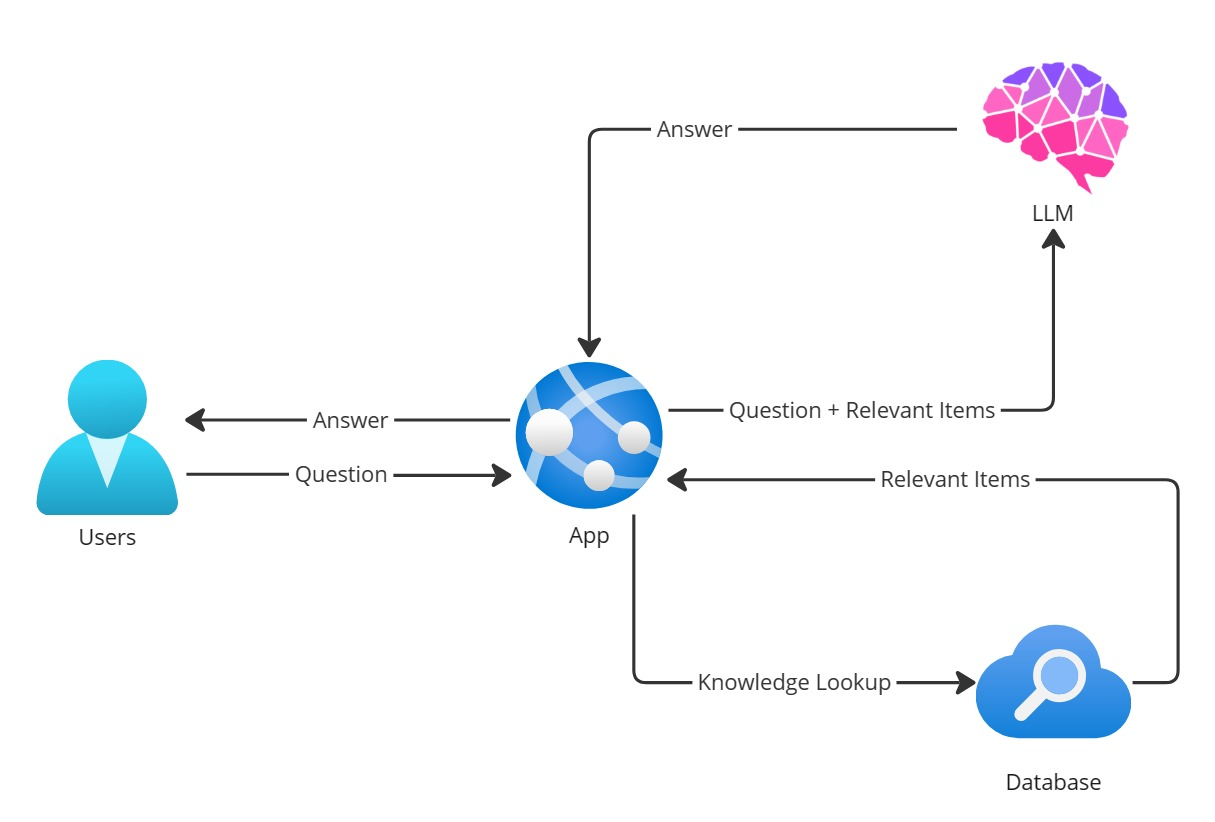
Reference:
- https://arxiv.org/pdf/2005.11401.pdf